In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from numba import njit
from datetime import datetime, timedelta
from scipy.spatial import Delaunay, ConvexHull

In [3]:
dir_data = '../data/noaa_data/'

In [7]:
df = pd.read_csv(dir_data + '3855690.csv')

In [11]:
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ASLP,ASLP_ATTRIBUTES,AWND,AWND_ATTRIBUTES,...,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00093037,"COLORADO SPRINGS MUNICIPAL AIRPORT, CO US",38.80949,-104.68873,1884.2,1950-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,12.8,",,0",-3.9,",,0",NaN,NaN,NaN,NaN
1,USW00093037,"COLORADO SPRINGS MUNICIPAL AIRPORT, CO US",38.80949,-104.68873,1884.2,1950-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,",,0",-7.2,",,0",NaN,NaN,NaN,NaN
2,USW00093037,"COLORADO SPRINGS MUNICIPAL AIRPORT, CO US",38.80949,-104.68873,1884.2,1950-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,-6.7,",,0",-23.3,",,0",NaN,NaN,NaN,NaN
3,USW00093037,"COLORADO SPRINGS MUNICIPAL AIRPORT, CO US",38.80949,-104.68873,1884.2,1950-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,-11.1,",,0",-23.9,",,0",NaN,NaN,NaN,NaN
4,USW00093037,"COLORADO SPRINGS MUNICIPAL AIRPORT, CO US",38.80949,-104.68873,1884.2,1950-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,-6.7,",,0",-18.3,",,0",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446095,USW00012932,"ALICE INTERNATIONAL AIRPORT, TX US",27.74131,-98.02507,52.0,2023-12-27,NaN,NaN,2.9,",,W",...,NaN,NaN,23.9,",,W",8.3,",,W",NaN,NaN,8.1,",,W"
9446096,USW00012932,"ALICE INTERNATIONAL AIRPORT, TX US",27.74131,-98.02507,52.0,2023-12-28,NaN,NaN,1.9,",,W",...,NaN,NaN,19.4,",,W",4.4,",,W",NaN,NaN,6.7,",,W"
9446097,USW00012932,"ALICE INTERNATIONAL AIRPORT, TX US",27.74131,-98.02507,52.0,2023-12-29,NaN,NaN,2.8,",,W",...,NaN,NaN,20.0,",,W",5.0,",,W",NaN,NaN,8.9,",,W"
9446098,USW00012932,"ALICE INTERNATIONAL AIRPORT, TX US",27.74131,-98.02507,52.0,2023-12-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# show all the column names
print(df.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'ASLP',
       'ASLP_ATTRIBUTES', 'AWND', 'AWND_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'TSUN', 'TSUN_ATTRIBUTES', 'WSF5',
       'WSF5_ATTRIBUTES'],
      dtype='object')


In [42]:
# get all station names
stations = df['NAME'].unique()

<Axes: title={'center': 'JACKSON HAWKINS FIELD, MS US'}, xlabel='DATE'>

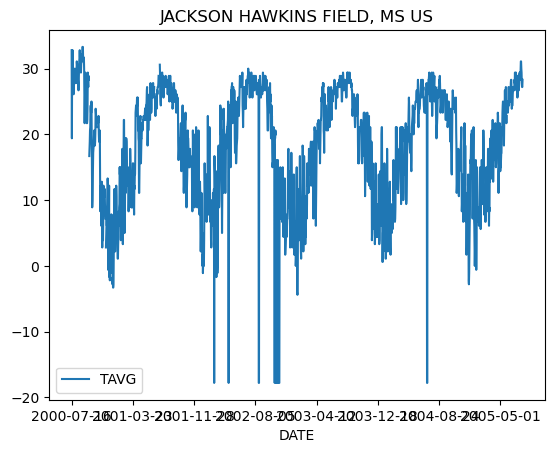

In [54]:
station_name = stations[239]
# get all the TAVG for the first station
df_station = df[df['NAME'] == station_name]
df_station = df_station[['DATE', 'TAVG']]
df_station.plot(x='DATE', y='TAVG', title=station_name)

In [58]:
file = dir_data + "GHCNh_AGM00060401_2005.parquet"
df2 = pd.read_parquet(file)

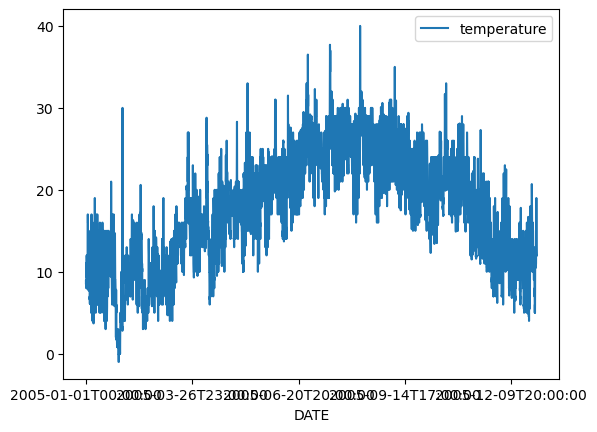

In [73]:
df2[['DATE', 'temperature']].plot(x='DATE', y='temperature')
plt.show()

In [92]:
df2[['DATE', 'precipitation_9_hour']]

,DATE,precipitation_9_hour
0,2005-01-01T00:00:00,None
1,2005-01-01T01:00:00,None
2,2005-01-01T02:00:00,None
3,2005-01-01T03:00:00,None
4,2005-01-01T04:00:00,None
...,...,...
8477,2005-12-31T19:00:00,None
8478,2005-12-31T20:00:00,None
8479,2005-12-31T21:00:00,None
8480,2005-12-31T22:00:00,None


In [61]:
list(df2.columns)

['Station_ID',
 'Station_name',
 'DATE',
 'Latitude',
 'Longitude',
 'Elevation',
 'temperature',
 'temperature_Measurement_Code',
 'temperature_Quality_Code',
 'temperature_Report_Type',
 'temperature_Source_Code',
 'temperature_Source_Station_ID',
 'dew_point_temperature',
 'dew_point_temperature_Measurement_Code',
 'dew_point_temperature_Quality_Code',
 'dew_point_temperature_Report_Type',
 'dew_point_temperature_Source_Code',
 'dew_point_temperature_Source_Station_ID',
 'station_level_pressure',
 'station_level_pressure_Measurement_Code',
 'station_level_pressure_Quality_Code',
 'station_level_pressure_Report_Type',
 'station_level_pressure_Source_Code',
 'station_level_pressure_Source_Station_ID',
 'sea_level_pressure',
 'sea_level_pressure_Measurement_Code',
 'sea_level_pressure_Quality_Code',
 'sea_level_pressure_Report_Type',
 'sea_level_pressure_Source_Code',
 'sea_level_pressure_Source_Station_ID',
 'wind_direction',
 'wind_direction_Measurement_Code',
 'wind_direction_Qualit

In [ ]:
# get the column ASLP
aslp = df['TAVG']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
9446095   NaN
9446096   NaN
9446097   NaN
9446098   NaN
9446099   NaN
Name: TAVG, Length: 9446100, dtype: float64

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [38]:
9446100 - np.isnan(list(aslp)).sum()

9346052